<a href="https://colab.research.google.com/github/saluSelo/ML-kidney-ckd-predict/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Final Project **

DATASET:

The data was taken over a 2-month period in India with 25 features ( eg, red blood cell count, white blood cell count, etc). The target is the 'classification', which is either 'ckd' ( Chronic kidney disease )  or 'notckd' ( patient who not suffered by chronic kidney disease) 


my task is to predict if the patient is ckd or not

##Importing the necessary libraries to work in the data

In [ ]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import metrics,model_selection,preprocessing,tree,svm,linear_model,feature_selection,neighbors
import pandas as pd
import seaborn as sns

##reading the dataset as csv

In [ ]:
data=pd.read_csv('/content/kidney_disease.csv')


##Displaying the data and its information 

In [ ]:
data

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51,7200,5.9,no,no,no,good,no,no,notckd


Dataset Information

bp - blood pressure / sg - specific gravity / al - albumin / su - sugar /
 rbc - red blood cells / pc - pus cell / pcc - pus cell clumps / ba - bacteria



bgr - blood glucose random / bu - blood urea / sc - serum creatinine /
sod - sodium / pot - potassium / hemo - hemoglobin / pcv - packed cell volume



wc - white blood cell count / rc - red blood cell count / htn - hypertension /
dm - diabetes mellitus / cad - coronary artery disease/ 

appet - appetite/pe - pedal edema /ane - anemia 




In [ ]:
data.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8c11627210>,
      dtype=object)

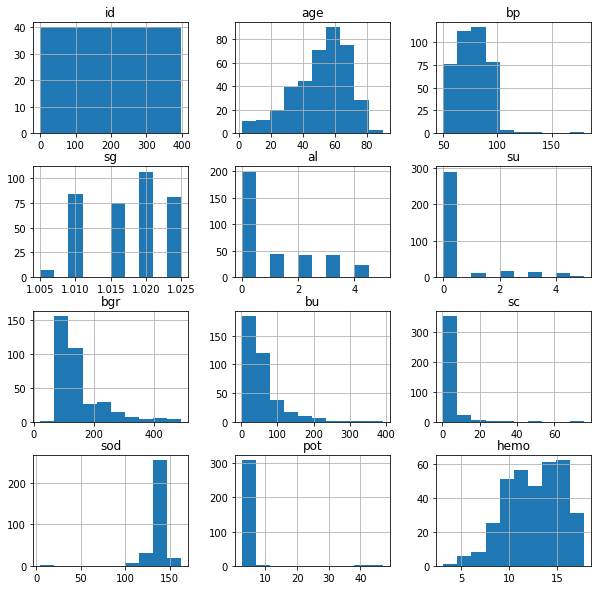

In [ ]:
data.hist(figsize=(10,10))

In [ ]:
data.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

##Cleaning the data

###First of all, let's get rid of the unnecessary culomns


In [ ]:
data.drop('id',axis=1,inplace=True)

###Checking for the values of numerical and non-numerical columns to handle them

In [ ]:
data['classification'].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [ ]:
data['classification']=data['classification'].replace(to_replace={'ckd':1,'ckd\t':1,'notckd':0})

In [ ]:
data.pc.unique()

array(['normal', 'abnormal', nan], dtype=object)

In [ ]:
data.rbc.unique()

array([nan, 'normal', 'abnormal'], dtype=object)

In [ ]:
data[['pc','rbc']] = data[['pc','rbc']].replace(to_replace={'abnormal':1,'normal':0})

In [ ]:
data.pcc.unique()

array(['notpresent', 'present', nan], dtype=object)

In [ ]:
data.ba.unique()

array(['notpresent', 'present', nan], dtype=object)

In [ ]:
data[['pcc','ba']] = data[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})

In [ ]:
data[['htn','dm','cad','pe','ane']]=data[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0,'\tno':0,'\tyes':1,'yes':1,' yes':1})

In [ ]:
data.appet.unique()

array(['good', 'poor', nan], dtype=object)

In [ ]:
data['appet']=data['appet'].replace(to_replace={'good':1,'poor':0})

In [ ]:
data.appet.unique()

array([ 1.,  0., nan])

###These columns are numercial, let's see their values

In [ ]:
data.rc.unique()

array(['5.2', nan, '3.9', '4.6', '4.4', '5', '4.0', '3.7', '3.8', '3.4',
       '2.6', '2.8', '4.3', '3.2', '3.6', '4', '4.1', '4.9', '2.5', '4.2',
       '4.5', '3.1', '4.7', '3.5', '6.0', '5.0', '2.1', '5.6', '2.3',
       '2.9', '2.7', '8.0', '3.3', '3.0', '3', '2.4', '4.8', '\t?', '5.4',
       '6.1', '6.2', '6.3', '5.1', '5.8', '5.5', '5.3', '6.4', '5.7',
       '5.9', '6.5'], dtype=object)

In [ ]:
data.wc.unique()

array(['7800', '6000', '7500', '6700', '7300', nan, '6900', '9600',
       '12100', '4500', '12200', '11000', '3800', '11400', '5300', '9200',
       '6200', '8300', '8400', '10300', '9800', '9100', '7900', '6400',
       '8600', '18900', '21600', '4300', '8500', '11300', '7200', '7700',
       '14600', '6300', '\t6200', '7100', '11800', '9400', '5500', '5800',
       '13200', '12500', '5600', '7000', '11900', '10400', '10700',
       '12700', '6800', '6500', '13600', '10200', '9000', '14900', '8200',
       '15200', '5000', '16300', '12400', '\t8400', '10500', '4200',
       '4700', '10900', '8100', '9500', '2200', '12800', '11200', '19100',
       '\t?', '12300', '16700', '2600', '26400', '8800', '7400', '4900',
       '8000', '12000', '15700', '4100', '5700', '11500', '5400', '10800',
       '9900', '5200', '5900', '9300', '9700', '5100', '6600'],
      dtype=object)

In [ ]:
data.pcv.unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', nan,
       '16', '24', '37', '30', '34', '40', '45', '27', '48', '\t?', '52',
       '14', '22', '18', '42', '17', '46', '23', '19', '25', '41', '26',
       '15', '21', '43', '20', '\t43', '47', '9', '49', '50', '53', '51',
       '54'], dtype=object)

In [ ]:
 #notice that we have an extra characetrs, we have to get rid of them
 data['rc'] = data['rc'].str.extract('(\d+)').astype(float)
 data['pcv'] = data['pcv'].str.extract('(\d+)').astype(float)
 data['wc'] = data['wc'].str.extract('(\d+)').astype(float)


In [ ]:
data.rc.unique()


array([ 5., nan,  3.,  4.,  2.,  6.,  8.])

In [ ]:
data.pcv.unique()

array([44., 38., 31., 32., 35., 39., 36., 33., 29., 28., nan, 16., 24.,
       37., 30., 34., 40., 45., 27., 48., 52., 14., 22., 18., 42., 17.,
       46., 23., 19., 25., 41., 26., 15., 21., 43., 20., 47.,  9., 49.,
       50., 53., 51., 54.])

In [ ]:
data.wc.unique()
#great! they are out of extra characters

array([ 7800.,  6000.,  7500.,  6700.,  7300.,    nan,  6900.,  9600.,
       12100.,  4500., 12200., 11000.,  3800., 11400.,  5300.,  9200.,
        6200.,  8300.,  8400., 10300.,  9800.,  9100.,  7900.,  6400.,
        8600., 18900., 21600.,  4300.,  8500., 11300.,  7200.,  7700.,
       14600.,  6300.,  7100., 11800.,  9400.,  5500.,  5800., 13200.,
       12500.,  5600.,  7000., 11900., 10400., 10700., 12700.,  6800.,
        6500., 13600., 10200.,  9000., 14900.,  8200., 15200.,  5000.,
       16300., 12400., 10500.,  4200.,  4700., 10900.,  8100.,  9500.,
        2200., 12800., 11200., 19100., 12300., 16700.,  2600., 26400.,
        8800.,  7400.,  4900.,  8000., 12000., 15700.,  4100.,  5700.,
       11500.,  5400., 10800.,  9900.,  5200.,  5900.,  9300.,  9700.,
        5100.,  6600.])

In [ ]:
data_cat = data[['rbc','pc','pcc','ba','pcv','wc','rc','htn','dm','cad','appet','pe','ane']]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


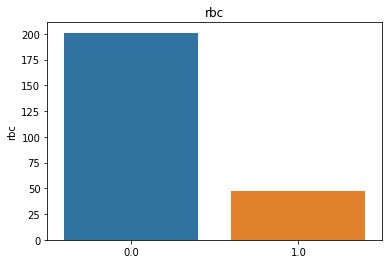

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


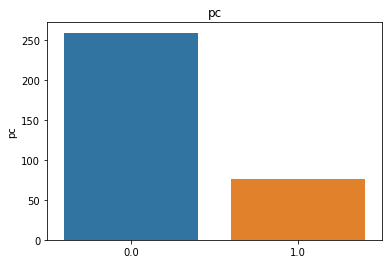

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


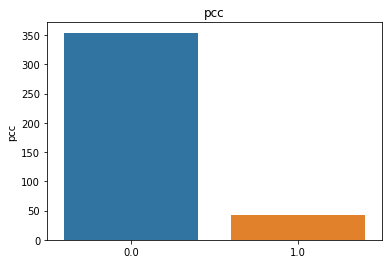

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


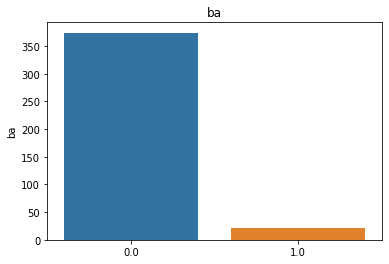

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


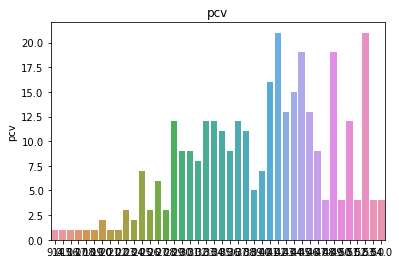

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


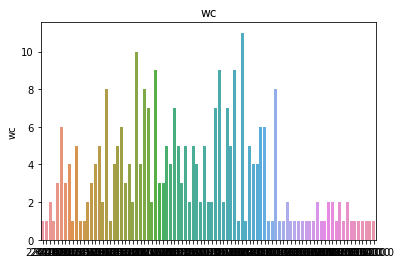

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


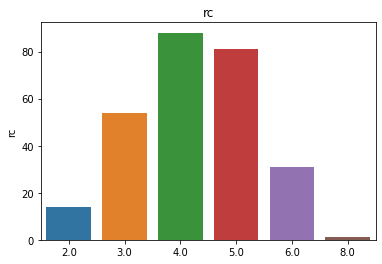

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


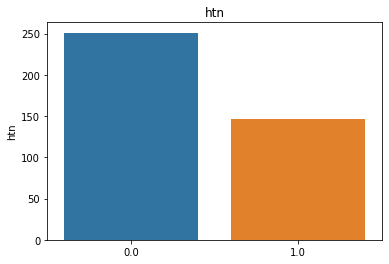

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


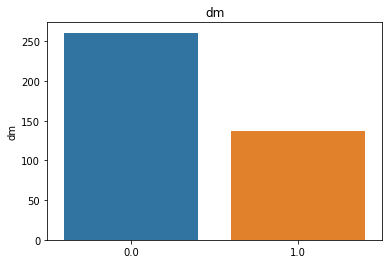

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


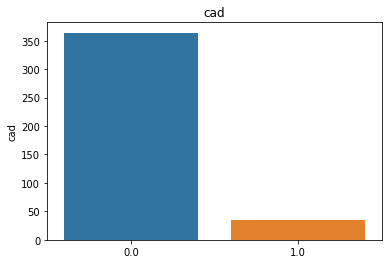

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


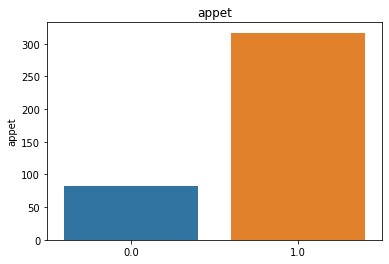

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


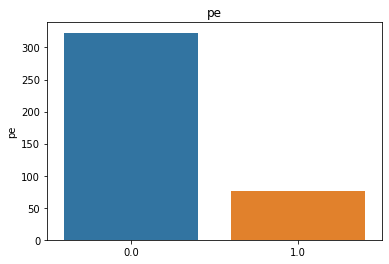

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


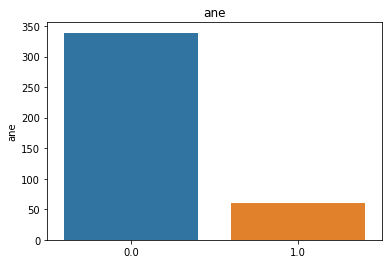

In [ ]:
for i in data_cat.columns:
    sns.barplot(data_cat[i].value_counts().index,data_cat[i].value_counts()).set_title(i)
    plt.show()

###Handling the NaN values

In [ ]:
data.isna().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                71
wc                106
rc                131
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [ ]:
data['pcv'].fillna(int(data['pcv'].mean()), inplace=True)
data['wc'].fillna(int(data['wc'].mean()), inplace=True)
data['rc'].fillna(int(data['rc'].mean()), inplace=True)
data['age'].fillna(int(data['age'].mean()), inplace=True)
data['bp'].fillna(int(data['bp'].mean()), inplace=True)
data['sg'].fillna(int(data['sg'].mean()), inplace=True)
data['al'].fillna(int(data['al'].mean()), inplace=True)
data['sg'].fillna(int(data['sg'].mean()), inplace=True)
data['su'].fillna(int(data['su'].mean()), inplace=True)
data['bgr'].fillna(int(data['bgr'].mean()), inplace=True)
data['bu'].fillna(int(data['bu'].mean()), inplace=True)
data['sc'].fillna(int(data['sc'].mean()), inplace=True)
data['sod'].fillna(int(data['sod'].mean()), inplace=True)
data['pot'].fillna(int(data['pot'].mean()), inplace=True)
data['hemo'].fillna(int(data['hemo'].mean()), inplace=True)



In [ ]:
data.isna().sum()

age                 0
bp                  0
sg                  0
al                  0
su                  0
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                 0
bu                  0
sc                  0
sod                 0
pot                 0
hemo                0
pcv                 0
wc                  0
rc                  0
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [ ]:
data.drop('rbc',axis=1,inplace=True)

In [ ]:
data.shape

(400, 24)

In [ ]:
data.isna().sum()

age                0
bp                 0
sg                 0
al                 0
su                 0
pc                65
pcc                4
ba                 4
bgr                0
bu                 0
sc                 0
sod                0
pot                0
hemo               0
pcv                0
wc                 0
rc                 0
htn                2
dm                 2
cad                2
appet              1
pe                 1
ane                1
classification     0
dtype: int64

In [ ]:
data['ba'].fillna(data['ba'].value_counts().index[0],inplace=True)
data['pcc'].fillna(data['pcc'].value_counts().index[0],inplace=True)
data['ane'].fillna(data['ane'].value_counts().index[0],inplace=True)
data['pe'].fillna(data['pe'].value_counts().index[0],inplace=True)
data['appet'].fillna(data['appet'].value_counts().index[0],inplace=True)
data['cad'].fillna(data['cad'].value_counts().index[0],inplace=True)
data['dm'].fillna(data['dm'].value_counts().index[0],inplace=True)
data['htn'].fillna(data['htn'].value_counts().index[0],inplace=True)
data['pc'].fillna(data['pc'].value_counts().index[0],inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             400 non-null    float64
 1   bp              400 non-null    float64
 2   sg              400 non-null    float64
 3   al              400 non-null    float64
 4   su              400 non-null    float64
 5   pc              400 non-null    float64
 6   pcc             400 non-null    float64
 7   ba              400 non-null    float64
 8   bgr             400 non-null    float64
 9   bu              400 non-null    float64
 10  sc              400 non-null    float64
 11  sod             400 non-null    float64
 12  pot             400 non-null    float64
 13  hemo            400 non-null    float64
 14  pcv             400 non-null    float64
 15  wc              400 non-null    float64
 16  rc              400 non-null    float64
 17  htn             400 non-null    flo

###DATA VISUALIZATION¶


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


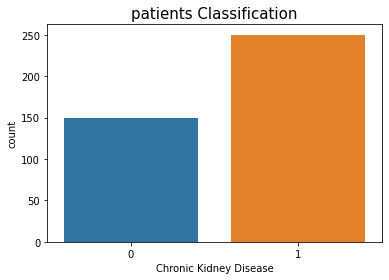

In [ ]:
sns.countplot(data.classification)
plt.xlabel('Chronic Kidney Disease')
plt.title("patients Classification",fontsize=15)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


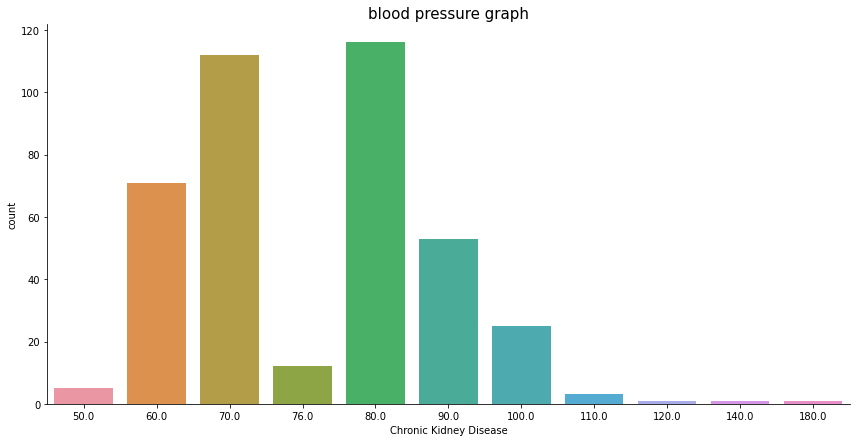

In [ ]:
sns.factorplot(data=data, x='bp', kind= 'count',size=6,aspect=2)
plt.xlabel('Chronic Kidney Disease')
plt.title("blood pressure graph",fontsize=15)
plt.show()

##Training models

In [ ]:
data = data.sample(frac = 1)

In [ ]:
x = data.iloc[:,0:23]
y = data.iloc[:,23]

In [ ]:
x

,age,bp,sg,al,su,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
256,60.0,80.0,1.025,0.0,0.0,0.0,0.0,0.0,131.0,10.0,0.5,146.0,5.0,14.5,41.0,10700.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0
234,37.0,100.0,1.010,0.0,0.0,0.0,0.0,0.0,148.0,19.0,1.3,137.0,4.0,15.0,44.0,4100.0,5.0,1.0,0.0,0.0,1.0,0.0,0.0
388,51.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,94.0,15.0,1.2,144.0,3.7,15.5,46.0,9500.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0
120,72.0,90.0,1.025,1.0,3.0,0.0,0.0,0.0,323.0,40.0,2.2,137.0,5.3,12.6,38.0,8406.0,4.0,0.0,1.0,1.0,0.0,0.0,0.0
161,62.0,76.0,1.015,3.0,0.0,0.0,0.0,0.0,148.0,57.0,3.0,137.0,4.0,14.3,42.0,10200.0,4.0,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,43.0,80.0,1.015,2.0,3.0,1.0,1.0,1.0,148.0,30.0,1.1,137.0,4.0,14.0,42.0,14900.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0
53,62.0,80.0,1.015,0.0,5.0,0.0,0.0,0.0,246.0,24.0,1.0,137.0,4.0,13.6,40.0,8500.0,4.0,1.0,1.0,0.0,1.0,0.0,0.0
332,34.0,70.0,1.025,0.0,0.0,0.0,0.0,0.0,148.0,33.0,1.0,150.0,5.0,15.3,44.0,10500.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0
138,73.0,76.0,1.010,1.0,0.0,0.0,0.0,0.0,95.0,51.0,1.6,142.0,3.5,12.0,38.0,8406.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
y

256    0
234    1
388    0
120    1
161    1
      ..
123    1
53     1
332    0
138    1
134    1
Name: classification, Length: 400, dtype: int64

In [ ]:
y.isna().sum()

0

In [ ]:
x.isna().sum()

age      0
bp       0
sg       0
al       0
su       0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wc       0
rc       0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
dtype: int64

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=1) # Numerical value
# rus = RandomUnderSampler(sampling_strategy="not minority") # String
new_x,new_y = rus.fit_resample(x, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
x_normalizer=preprocessing.StandardScaler()
x_norm=x_normalizer.fit_transform(new_x)


In [ ]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(x_norm,new_y,test_size=0.1,random_state=42)

In [ ]:
svm_model=svm.SVC(kernel='linear')
svm_model.fit(x_train,y_train)
pred=svm_model.predict(x_test)


In [ ]:
print(f'the acc is : {metrics.accuracy_score(y_test,pred)}')

the acc is : 0.9666666666666667


In [ ]:
svm_model_2=svm.SVC(kernel='rbf')
svm_model_2.fit(x_train,y_train)
pred=svm_model.predict(x_test)
print(f'the acc is : {metrics.accuracy_score(y_test,pred)}')

the acc is : 0.9666666666666667


In [ ]:
knn_model =neighbors.KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train, y_train)
y_pred=knn_model.predict(x_test)
print('the accuracy of this model is :',metrics.accuracy_score(y_test,pred))

the accuracy of this model is : 0.9666666666666667


In [ ]:
svc = svm.SVC()


In [ ]:
params = {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10], 'gamma': ['scale', 'auto', 0.1, 1]}


In [ ]:

scoring = {
    'accuracy': metrics.make_scorer(metrics.accuracy_score),
    'precision': metrics.make_scorer(metrics.precision_score), 
    'recall': metrics.make_scorer(metrics.recall_score)
    }

In [ ]:
kfold = model_selection.StratifiedShuffleSplit(5, random_state=42)


In [ ]:
gs = model_selection.GridSearchCV(svc, params, cv=kfold, scoring=scoring, refit="recall", verbose=2)


In [ ]:
gs.fit(x, y)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] C=0.1, gamma=scale, kernel=linear ...............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................ C=0.1, gamma=scale, kernel=linear, total=  13.5s
[CV] C=0.1, gamma=scale, kernel=linear ...............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.5s remaining:    0.0s


[CV] ................ C=0.1, gamma=scale, kernel=linear, total=   4.2s
[CV] C=0.1, gamma=scale, kernel=linear ...............................
[CV] ................ C=0.1, gamma=scale, kernel=linear, total=   4.8s
[CV] C=0.1, gamma=scale, kernel=linear ...............................
[CV] ................ C=0.1, gamma=scale, kernel=linear, total=  13.0s
[CV] C=0.1, gamma=scale, kernel=linear ...............................
[CV] ................ C=0.1, gamma=scale, kernel=linear, total=  19.7s
[CV] C=0.1, gamma=scale, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=scale, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=scale, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=scale, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=scale, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=scale, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=scale, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed: 15.6min finished


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=None,
            train_size=None),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto', 0.1, 1],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit='recall', return_train_score=False,
             scoring={'accuracy': make_scorer(accuracy_score),
                      'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score)},
            

In [ ]:
print("Best Hyperparameters:", gs.best_params_)
print("Best Score (Recall): ", gs.best_score_)

Best Hyperparameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Score (Recall):  1.0


In [ ]:
best_svc = gs.best_estimator_
best_svc

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
df = pd.DataFrame(gs.cv_results_)
df.sort_values(['mean_test_precision'])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,split4_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall
17,0.015132,0.001484,0.004199,0.000067,10,scale,rbf,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}",0.625,0.625,0.625,0.625,0.600,0.620,0.010000,24,0.625000,0.625,0.625000,0.625,0.615385,0.623077,0.003846,24,1.0,1.00,1.00,1.00,0.96,0.992,0.016000,12
11,0.014510,0.000373,0.004497,0.000432,1,auto,rbf,"{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}",0.625,0.625,0.625,0.625,0.625,0.625,0.000000,13,0.625000,0.625,0.625000,0.625,0.625000,0.625000,0.000000,13,1.0,1.00,1.00,1.00,1.00,1.000,0.000000,1
21,0.013161,0.000361,0.005533,0.001394,10,0.1,rbf,"{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}",0.625,0.625,0.625,0.625,0.625,0.625,0.000000,13,0.625000,0.625,0.625000,0.625,0.625000,0.625000,0.000000,13,1.0,1.00,1.00,1.00,1.00,1.000,0.000000,1
19,0.014151,0.000542,0.004544,0.000414,10,auto,rbf,"{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}",0.625,0.625,0.625,0.625,0.625,0.625,0.000000,13,0.625000,0.625,0.625000,0.625,0.625000,0.625000,0.000000,13,1.0,1.00,1.00,1.00,1.00,1.000,0.000000,1
15,0.013640,0.000794,0.004231,0.000065,1,1,rbf,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}",0.625,0.625,0.625,0.625,0.625,0.625,0.000000,13,0.625000,0.625,0.625000,0.625,0.625000,0.625000,0.000000,13,1.0,1.00,1.00,1.00,1.00,1.000,0.000000,1
13,0.014657,0.000663,0.004548,0.000246,1,0.1,rbf,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.625,0.625,0.625,0.625,0.625,0.625,0.000000,13,0.625000,0.625,0.625000,0.625,0.625000,0.625000,0.000000,13,1.0,1.00,1.00,1.00,1.00,1.000,0.000000,1
9,0.017748,0.005615,0.004871,0.001154,1,scale,rbf,"{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}",0.625,0.625,0.625,0.625,0.625,0.625,0.000000,13,0.625000,0.625,0.625000,0.625,0.625000,0.625000,0.000000,13,1.0,1.00,1.00,1.00,1.00,1.000,0.000000,1
23,0.012360,0.001686,0.004735,0.000734,10,1,rbf,"{'C': 10, 'gamma': 1, 'kernel': 'rbf'}",0.625,0.625,0.625,0.625,0.625,0.625,0.000000,13,0.625000,0.625,0.625000,0.625,0.625000,0.625000,0.000000,13,1.0,1.00,1.00,1.00,1.00,1.000,0.000000,1
5,0.014021,0.000521,0.004702,0.000281,0.1,0.1,rbf,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}",0.625,0.625,0.625,0.625,0.625,0.625,0.000000,13,0.625000,0.625,0.625000,0.625,0.625000,0.625000,0.000000,13,1.0,1.00,1.00,1.00,1.00,1.000,0.000000,1
3,0.013814,0.000332,0.004430,0.000071,0.1,auto,rbf,"{'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}",0.625,0.625,0.625,0.625,0.625,0.625,0.000000,13,0.625000,0.625,0.625000,0.625,0.625000,0.625000,0.000000,13,1.0,1.00,1.00,1.00,1.00,1.000,0.000000,1


In [ ]:
svm_model=svm.SVC(kernel='rbf',C=0.1)
svm_model.fit(x_train,y_train)
pred=svm_model.predict(x_test)
print('the accuracy of this model is :',metrics.accuracy_score(y_test,pred))


the accuracy of this model is : 1.0


best model is the svc rbf tuning at c=0.1